<a href="https://colab.research.google.com/github/circuit-geek/Summer-Internship-2021/blob/master/ATOM_Rocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
!unzip drive/MyDrive/data/train.zip

Archive:  drive/MyDrive/data/train.zip
  inflating: Dataset/Sedimentary/Limestone/131.jpg  
  inflating: Dataset/Sedimentary/Limestone/137.jpg  
  inflating: Dataset/Sedimentary/Limestone/298.jpg  
  inflating: Dataset/Sedimentary/Limestone/124.jpg  
  inflating: Dataset/Sedimentary/Limestone/138.jpg  
  inflating: Dataset/Metamorphic/Marble/1 (504).jpg  
  inflating: Dataset/Sedimentary/Limestone/327.jpg  
  inflating: Dataset/Sedimentary/Limestone/25.jpg  
  inflating: Dataset/Sedimentary/Limestone/26.jpg  
  inflating: Dataset/Sedimentary/Limestone/113.jpg  
  inflating: Dataset/Metamorphic/Marble/31e2cae7a399bd4322fc2f0a8351995e.jpg  
  inflating: Dataset/Sedimentary/Limestone/70.jpg  
  inflating: Dataset/Sedimentary/Limestone/163.jpg  
  inflating: Dataset/Sedimentary/Limestone/256.jpg  
  inflating: Dataset/Sedimentary/Limestone/280.jpeg  
  inflating: Dataset/Metamorphic/Marble/1 (476).jpg  
  inflating: Dataset/Sedimentary/Limestone/112.jpg  
  inflating: Dataset/Sedimentary/L

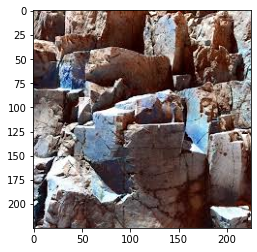

In [15]:
Datadir = "Dataset/Igneous"
categories = ["Basalt", "Granite"]

for category in categories:
  path = os.path.join(Datadir, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    plt.imshow(img_array)
    plt.show()
    break
  break

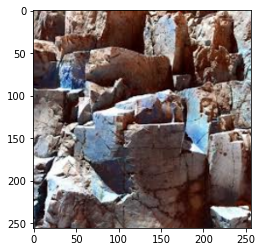

In [38]:
img_size = 256
new_img_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_img_array)
plt.show()

In [34]:
training_data = []

def create_training_data():
  for category in categories:
    path = os.path.join(Datadir, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_img_array = cv2.resize(img_array, (256, 256))
        training_data.append([new_img_array, class_num])
      except Exception as e:
        pass
        
create_training_data()

In [18]:
print(len(training_data))

373


In [19]:
import random

random.shuffle(training_data)

In [20]:
for sample in training_data[:10]:
  print(sample[1])

0
1
1
1
0
1
0
0
0
0


In [43]:
X = []
y = []

In [44]:
for features, label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)
y = np.array(y)

In [45]:
X = X / 255.0

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", 
              optimizer = "adam", 
              metrics=['accuracy'])

model.fit(X,y,epochs=10, batch_size = 16)

Epoch 1/10
24/24 [==============================] - 56s 2s/step - loss: 4.3669 - accuracy: 0.6488
Epoch 2/10
24/24 [==============================] - 57s 2s/step - loss: 0.6274 - accuracy: 0.7668
Epoch 3/10
24/24 [==============================] - 55s 2s/step - loss: 0.5442 - accuracy: 0.7828
Epoch 4/10
24/24 [==============================] - 55s 2s/step - loss: 0.3749 - accuracy: 0.8552
Epoch 5/10
24/24 [==============================] - 55s 2s/step - loss: 0.2135 - accuracy: 0.9303
Epoch 6/10
24/24 [==============================] - 55s 2s/step - loss: 0.1186 - accuracy: 0.9651
Epoch 7/10
24/24 [==============================] - 55s 2s/step - loss: 0.0763 - accuracy: 0.9866
Epoch 8/10
24/24 [==============================] - 55s 2s/step - loss: 0.0424 - accuracy: 0.9839
Epoch 9/10
24/24 [==============================] - 55s 2s/step - loss: 0.0130 - accuracy: 0.9973
Epoch 10/10
24/24 [==============================] - 55s 2s/step - loss: 0.0268 - accuracy: 0.9946
